# Jupyter Notebook Version for calculating Pacific Impact on Sahelian Rain Fall

In [9]:
import numpy as np  # Used later
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation

## Configuration

In [10]:
predictor = Dataset("HadISST_sst-1960_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.APR, monthf=Month.JUN,
           year0=1970, yearf=2000),
)

predictand = Dataset("cru_ts4.06.1960.2021.nc", "./datasets").open("pre").slice(
    Region(lat0=0, latf=25,
           lon0=-20, lonf=20,
           month0=Month.JUL, monthf=Month.SEP,
           year0=1970, yearf=2000),
)
#  There is a lag of 3 months (from April to July)

## Methodology

### Preprocessing

In [11]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=4, order=4, freq="high")
predictor_preprocessed.save("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# predictand_preprocessed = Preprocess.load("z_", "./data-Pacific_Impact_Sahelian_Rainfall")

[INFO] Preprocessing data for variable sst took: 0.716 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/y_*.npy`
[INFO] Preprocessing data for variable pre took: 0.021 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/z_*.npy`


### MCA

In [12]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# mca = MCA.load("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(4000, 31) 
            Y(8400, 31) 
    Regions: Z JAS (0.00ºN, 25.00ºN - 20.00ºW, 20.00ºE) 
            Y AMJ (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW)
       Took: 13.685 seconds
[INFO] Saving MCA data in `./data-Pacific_Impact_Sahelian_Rainfall/mca_*.npy`


### Crossvalidation

In [13]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/")
#cross = Crossvalidation.load("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying Crossvalidation 
    Shapes: Z(4000, 31) 
            Y(8400, 31) 
    Regions: Z JAS (0.00ºN, 25.00ºN - 20.00ºW, 20.00ºE) 
            Y AMJ (30.00ºS, 30.00ºN - 160.00ºE, 60.00ºW)
	year: 1 of 31
	year: 2 of 31
	year: 3 of 31
	year: 4 of 31
	year: 5 of 31
	year: 6 of 31
	year: 7 of 31
	year: 8 of 31
	year: 9 of 31
	year: 10 of 31
	year: 11 of 31
	year: 12 of 31
	year: 13 of 31
	year: 14 of 31
	year: 15 of 31
	year: 16 of 31
	year: 17 of 31
	year: 18 of 31
	year: 19 of 31
	year: 20 of 31
	year: 21 of 31
	year: 22 of 31
	year: 23 of 31
	year: 24 of 31
	year: 25 of 31
	year: 26 of 31
	year: 27 of 31
	year: 28 of 31
	year: 29 of 31
	year: 30 of 31
	year: 31 of 31

	Took: 485.598 seconds
[INFO] Saving Crossvalidation data in `./data-Pacific_Impact_Sahelian_Rainfall/cross_*.npy`


## Plotting results

[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/cross.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/zhat_1999.png


(<Figure size 1200x1000 with 5 Axes>,
 (<GeoAxesSubplot:title={'center':'Y on year 1999'}>,
  <GeoAxesSubplot:title={'center':'Zhat on year 1999'}>,
  <GeoAxesSubplot:title={'center':'Z on year 1999'}>))

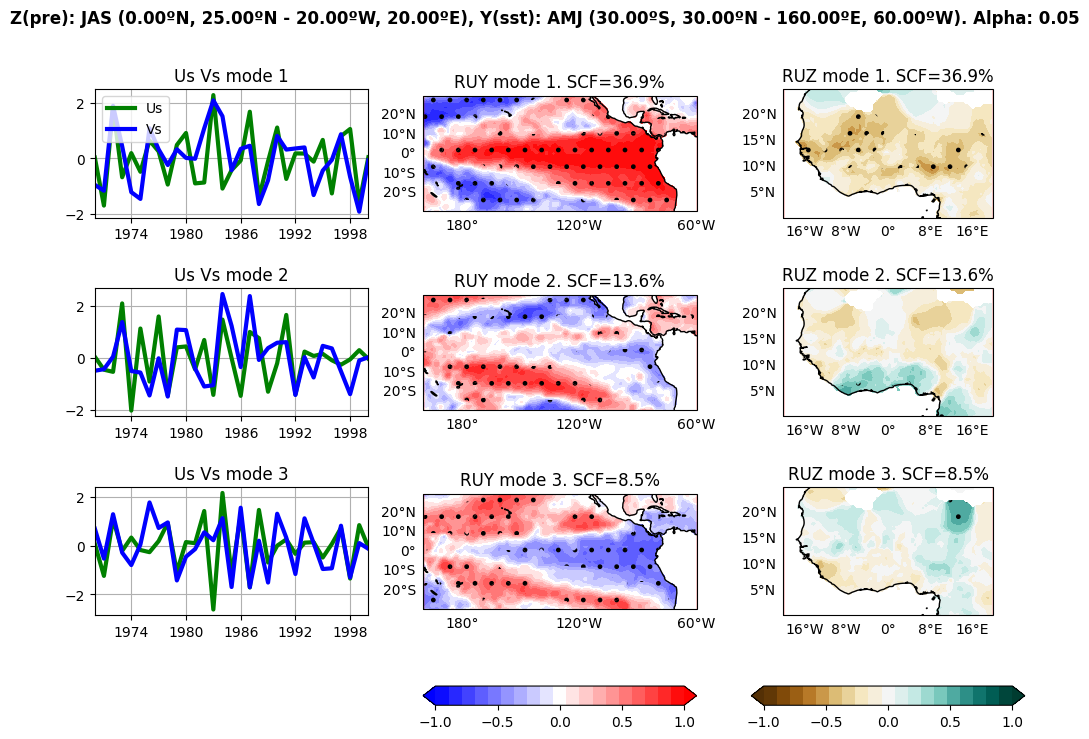

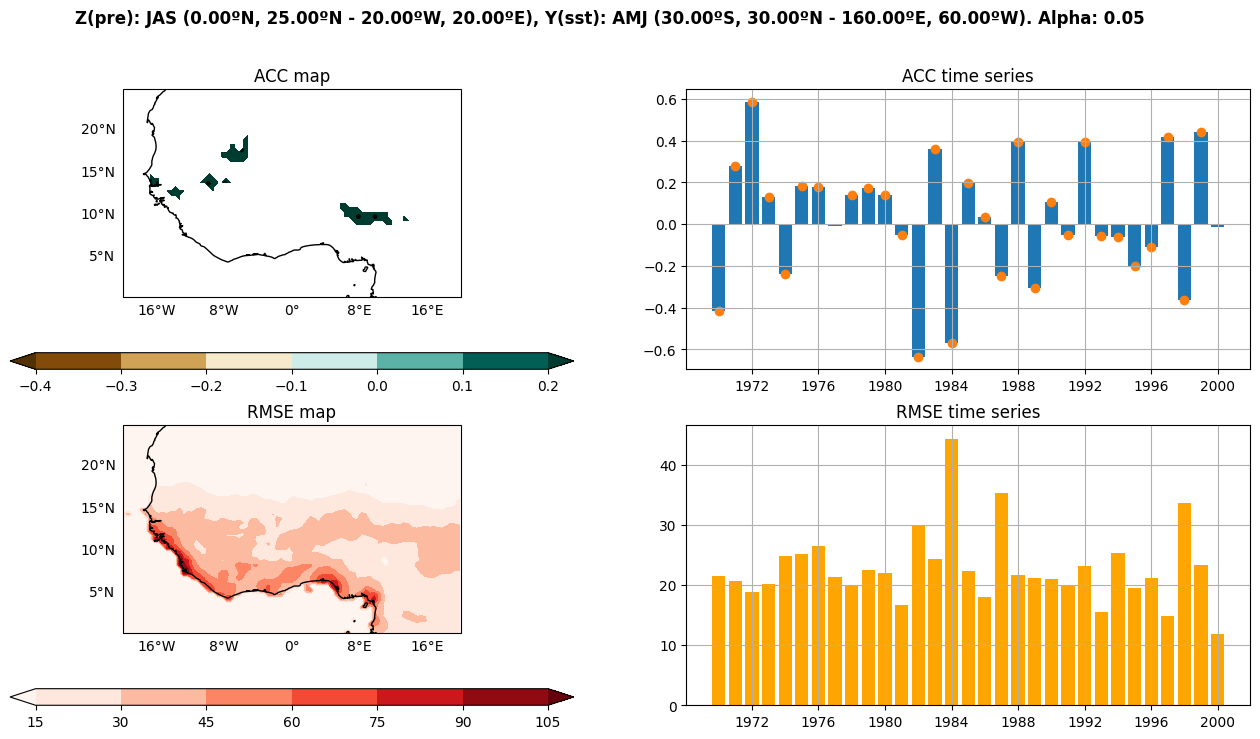

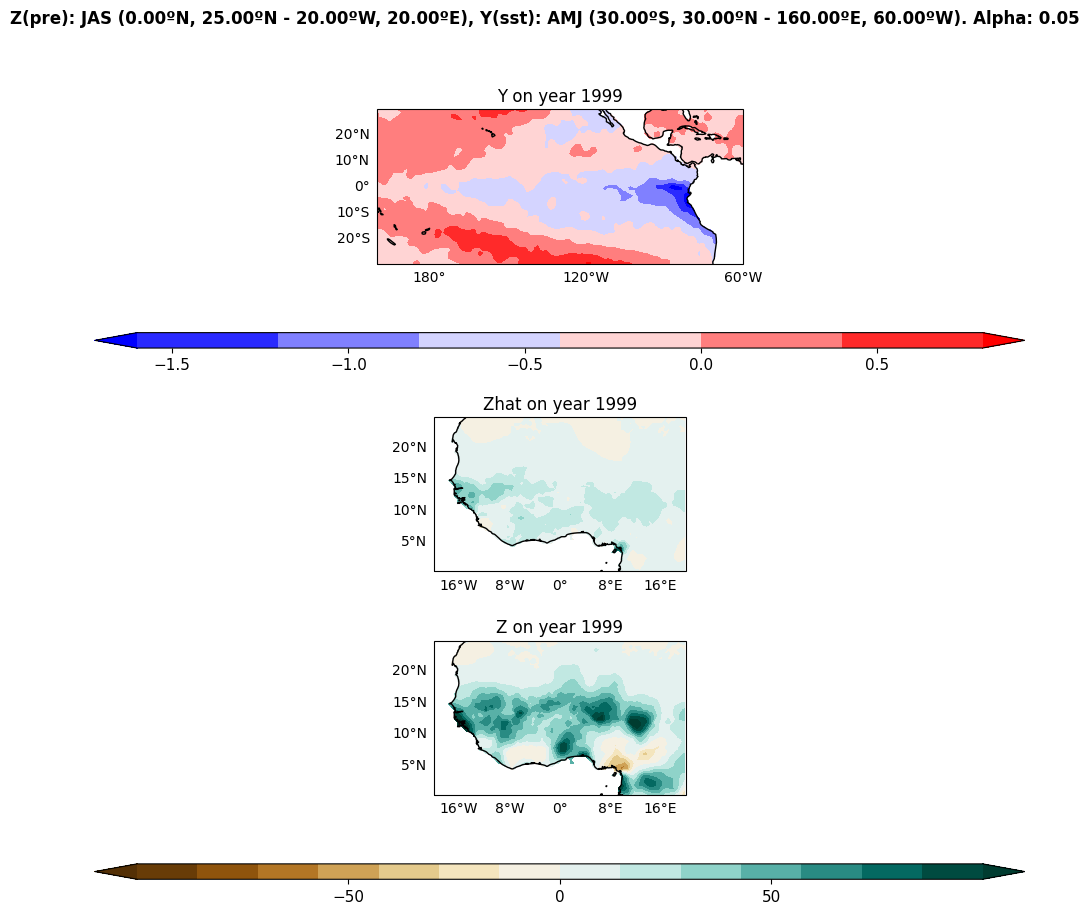

In [16]:
mca.plot(
    save_fig=True, cmap="BrBG", name="mca.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
    width_ratios=[1, 1, 1],
)
cross.plot(
    save_fig=True, name="cross.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    cmap="BrBG", 
    map_ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
    map_levels=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
)
cross.plot_zhat(1999, figsize=(12, 10), save_fig=True, name="zhat_1999.png", 
                folder="./plots-Pacific_Impact_Sahelian_Rainfall/", cmap="BrBG", 
                z_levels=np.linspace(-100, 100, 15))

[INFO] Preprocessing data for variable sst took: 0.498 seconds
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca2.png


((<Figure size 1200x800 with 11 Axes>,),
 (<AxesSubplot:title={'center':'Us Vs mode 1'}>,
  <AxesSubplot:title={'center':'Us Vs mode 2'}>,
  <AxesSubplot:title={'center':'Us Vs mode 3'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 1. SCF=36.9%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 2. SCF=13.6%'}>,
  <GeoAxesSubplot:title={'center':'RUY mode 3. SCF=8.5%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 1. SCF=36.9%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 2. SCF=13.6%'}>,
  <GeoAxesSubplot:title={'center':'RUZ mode 3. SCF=8.5%'}>))

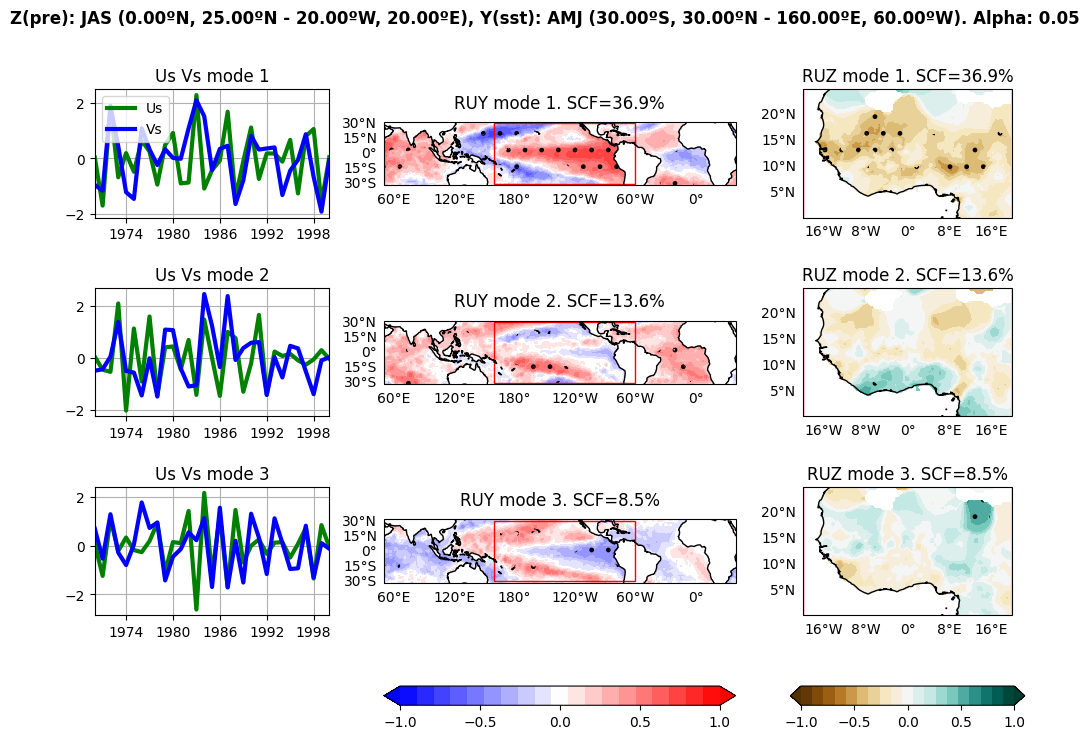

In [19]:
# Plot regression on a bigger map

map_y = Dataset("HadISST_sst-1960_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-32, latf=32,
           lon0=-309.5, lonf=39.5,
           month0=Month.APR, monthf=Month.JUN,
           year0=1970, yearf=2000),
)

map_y_pre = Preprocess(map_y)

mca.plot(
    save_fig=True, cmap="BrBG", name="mca2.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
    width_ratios=[2, 3, 2],
    map_y=map_y_pre)